downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


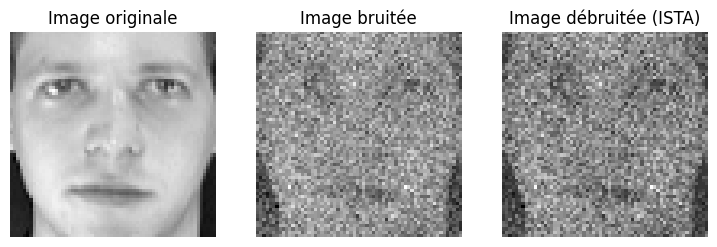

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# --------------------------------------------------
# Opérateur de seuillage doux (Soft-Thresholding)
# --------------------------------------------------
def soft_thresholding(v, gamma):
    return np.sign(v) * np.maximum(np.abs(v) - gamma, 0)

# --------------------------------------------------
# Chargement du dataset Olivetti Faces
# (sklearn utilisé UNIQUEMENT pour charger les données)
# --------------------------------------------------
data = fetch_olivetti_faces()
img = data.images[0]

# --------------------------------------------------
# Ajout de bruit gaussien à l'image
# --------------------------------------------------
np.random.seed(0)
sigma = 0.2
y_noisy = img + sigma * np.random.randn(*img.shape)

# --------------------------------------------------
# Problème de débruitage :
# min_w (1/2)||w - y||^2 + lambda||w||_1
#
# f(w) = (1/2)||w - y||^2
# gradient : ∇f(w) = w - y
# L = 1
# --------------------------------------------------
def ista_denoising(y, lam, max_iter=100):
    w = np.zeros_like(y)

    for _ in range(max_iter):
        grad = w - y
        w = soft_thresholding(w - grad, lam)

    return w

# --------------------------------------------------
# Application de l'algorithme ISTA
# --------------------------------------------------
lam = 0.1
img_denoised = ista_denoising(y_noisy, lam)

# --------------------------------------------------
# Affichage des résultats
# --------------------------------------------------
plt.figure(figsize=(9, 3))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.title("Image originale")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(y_noisy, cmap="gray")
plt.title("Image bruitée")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_denoised, cmap="gray")
plt.title("Image débruitée (ISTA)")
plt.axis("off")

plt.show()